# ___

<a href='https://github.com/somyapadliy/somyapadliy.github.io'> <img src='SomyaPadliyaLogo.png' /></a>
___
# Introduction


** This tutorial walk users through the entire data science pipeline: data curation, parsing, and management; exploratory data
analysis; hypothesis testing and machine learning to provide analysis and messages covering insights learned during the tutorial. **

The dataset used for this tutorial is Auto- MPG data-set from  UCI Machine Learning Library available at https://archive.ics.uci.edu/ml/datasets/Auto+MPG.

** Source: **

This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. The dataset was used in the 1983 American Statistical Association Exposition.


** Data Set Information: **

This dataset is a slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for the "mpg" attribute. The original dataset is available in the file "auto-mpg.data-original". 

"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)


** Attribute Information: **

1. mpg: continuous 
2. cylinders: multi-valued discrete 
3. displacement: continuous 
4. horsepower: continuous 
5. weight: continuous 
6. acceleration: continuous 
7. model year: multi-valued discrete 
8. origin: multi-valued discrete 
9. car name: string (unique for each instance)



**Let's get started!**
## Step 1: Loading data and Tidying
Dataset auto-mpg.csv  has been downloaded fromt he source and kept locally for loading and tidying. The next step is to get our environment ready with the libraries we'll need and then import the data!
### Import Libraries

In [3125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'

### Check out the Data

In [3126]:
data = pd.read_csv('auto-mpg.csv',index_col='car name')

In [3127]:
data.head()

mpg  cylinders  displacement horsepower  weight  \
car name                                                                      
chevrolet chevelle malibu  18.0          8         307.0        130    3504   
buick skylark 320          15.0          8         350.0        165    3693   
plymouth satellite         18.0          8         318.0        150    3436   
amc rebel sst              16.0          8         304.0        150    3433   
ford torino                17.0          8         302.0        140    3449   

                           acceleration  model year  origin  
car name                                                     
chevrolet chevelle malibu          12.0          70       1  
buick skylark 320                  11.5          70       1  
plymouth satellite                 11.0          70       1  
amc rebel sst                      12.0          70       1  
ford torino                        10.5          70       1

In [3128]:


data=data.rename(columns = {'model year':'model_year'})

### Check the data types and shape of the Data

In [3129]:
data.dtypes


mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model_year        int64
origin            int64
dtype: object

In [3130]:
data.shape

(398, 8)

### Check if data contains any NULLs

In [3131]:
data.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model_year      False
origin          False
dtype: bool

### Check unique values in each column

In [3132]:
data['cylinders'].unique()

array([8, 4, 6, 3, 5])

In [3133]:
data.displacement.unique()

array([ 307. ,  350. ,  318. ,  304. ,  302. ,  429. ,  454. ,  440. ,
        455. ,  390. ,  383. ,  340. ,  400. ,  113. ,  198. ,  199. ,
        200. ,   97. ,  110. ,  107. ,  104. ,  121. ,  360. ,  140. ,
         98. ,  232. ,  225. ,  250. ,  351. ,  258. ,  122. ,  116. ,
         79. ,   88. ,   71. ,   72. ,   91. ,   97.5,   70. ,  120. ,
         96. ,  108. ,  155. ,   68. ,  114. ,  156. ,   76. ,   83. ,
         90. ,  231. ,  262. ,  134. ,  119. ,  171. ,  115. ,  101. ,
        305. ,   85. ,  130. ,  168. ,  111. ,  260. ,  151. ,  146. ,
         80. ,   78. ,  105. ,  131. ,  163. ,   89. ,  267. ,   86. ,
        183. ,  141. ,  173. ,  135. ,   81. ,  100. ,  145. ,  112. ,
        181. ,  144. ])

In [3134]:
data['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148', '129',
       '96', '71', '98', '115', '53', '81', '79', '120', '152', '102',
       '108', '68', '58', '149', '89', '63', '48', '66', '139', '103',
       '125', '133', '138', '135', '142', '77', '62', '132', '84', '64',
       '74', '116', '82'], dtype=object)

In [3135]:
data['weight'].unique()

array([3504, 3693, 3436, 3433, 3449, 4341, 4354, 4312, 4425, 3850, 3563,
       3609, 3761, 3086, 2372, 2833, 2774, 2587, 2130, 1835, 2672, 2430,
       2375, 2234, 2648, 4615, 4376, 4382, 4732, 2264, 2228, 2046, 2634,
       3439, 3329, 3302, 3288, 4209, 4464, 4154, 4096, 4955, 4746, 5140,
       2962, 2408, 3282, 3139, 2220, 2123, 2074, 2065, 1773, 1613, 1834,
       1955, 2278, 2126, 2254, 2226, 4274, 4385, 4135, 4129, 3672, 4633,
       4502, 4456, 4422, 2330, 3892, 4098, 4294, 4077, 2933, 2511, 2979,
       2189, 2395, 2288, 2506, 2164, 2100, 4100, 3988, 4042, 3777, 4952,
       4363, 4237, 4735, 4951, 3821, 3121, 3278, 2945, 3021, 2904, 1950,
       4997, 4906, 4654, 4499, 2789, 2279, 2401, 2379, 2124, 2310, 2472,
       2265, 4082, 4278, 1867, 2158, 2582, 2868, 3399, 2660, 2807, 3664,
       3102, 2875, 2901, 3336, 2451, 1836, 2542, 3781, 3632, 3613, 4141,
       4699, 4457, 4638, 4257, 2219, 1963, 2300, 1649, 2003, 2125, 2108,
       2246, 2489, 2391, 2000, 3264, 3459, 3432, 31

In [3136]:
data['acceleration'].unique()

array([ 12. ,  11.5,  11. ,  10.5,  10. ,   9. ,   8.5,   8. ,   9.5,
        15. ,  15.5,  16. ,  14.5,  20.5,  17.5,  12.5,  14. ,  13.5,
        18.5,  19. ,  13. ,  19.5,  18. ,  17. ,  23.5,  16.5,  21. ,
        16.9,  14.9,  17.7,  15.3,  13.9,  12.8,  15.4,  17.6,  22.2,
        22.1,  14.2,  17.4,  16.2,  17.8,  12.2,  16.4,  13.6,  15.7,
        13.2,  21.9,  16.7,  12.1,  14.8,  18.6,  16.8,  13.7,  11.1,
        11.4,  18.2,  15.8,  15.9,  14.1,  21.5,  14.4,  19.4,  19.2,
        17.2,  18.7,  15.1,  13.4,  11.2,  14.7,  16.6,  17.3,  15.2,
        14.3,  20.1,  24.8,  11.3,  12.9,  18.8,  18.1,  17.9,  21.7,
        23.7,  19.9,  21.8,  13.8,  12.6,  16.1,  20.7,  18.3,  20.4,
        19.6,  17.1,  15.6,  24.6,  11.6])

In [3137]:
data['model_year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

In [3138]:
data['origin'].unique()

array([1, 3, 2])

### Check columns which have non numeric data

In [3139]:
for column in data:
    if ( data[column].dtype.kind not in 'if'):
        print(column, " -->contains non numeric data")

horsepower  -->contains non numeric data


### Remove rows with non numeric data in horsepower column and create a new dataframe.

In [3140]:

auto_data = data[data['horsepower'].apply(lambda x:  x.isnumeric())]

In [3141]:
auto_data.head()


mpg  cylinders  displacement horsepower  weight  \
car name                                                                      
chevrolet chevelle malibu  18.0          8         307.0        130    3504   
buick skylark 320          15.0          8         350.0        165    3693   
plymouth satellite         18.0          8         318.0        150    3436   
amc rebel sst              16.0          8         304.0        150    3433   
ford torino                17.0          8         302.0        140    3449   

                           acceleration  model_year  origin  
car name                                                     
chevrolet chevelle malibu          12.0          70       1  
buick skylark 320                  11.5          70       1  
plymouth satellite                 11.0          70       1  
amc rebel sst                      12.0          70       1  
ford torino                        10.5          70       1

In [3142]:
auto_data['horsepower']=auto_data['horsepower'].astype('float')

In [3143]:
auto_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin            int64
dtype: object

In [3144]:
auto_data.shape

(392, 8)

## Step 2: Exploratory Analysis and Visualization
Dataset auto-mpg.csv  has been tidied and non numeric values from key columns have been removed. The new dataframe has all numeric columns.

To understand the correlation relationship between each variable, we  can plot a scatter matrix. In the below scatter matrix, each unit is a scatterplot with certain variables be the x value and y value respectively. From the scatterplot, we are able to tell how the two variables are related or not correlated at all.


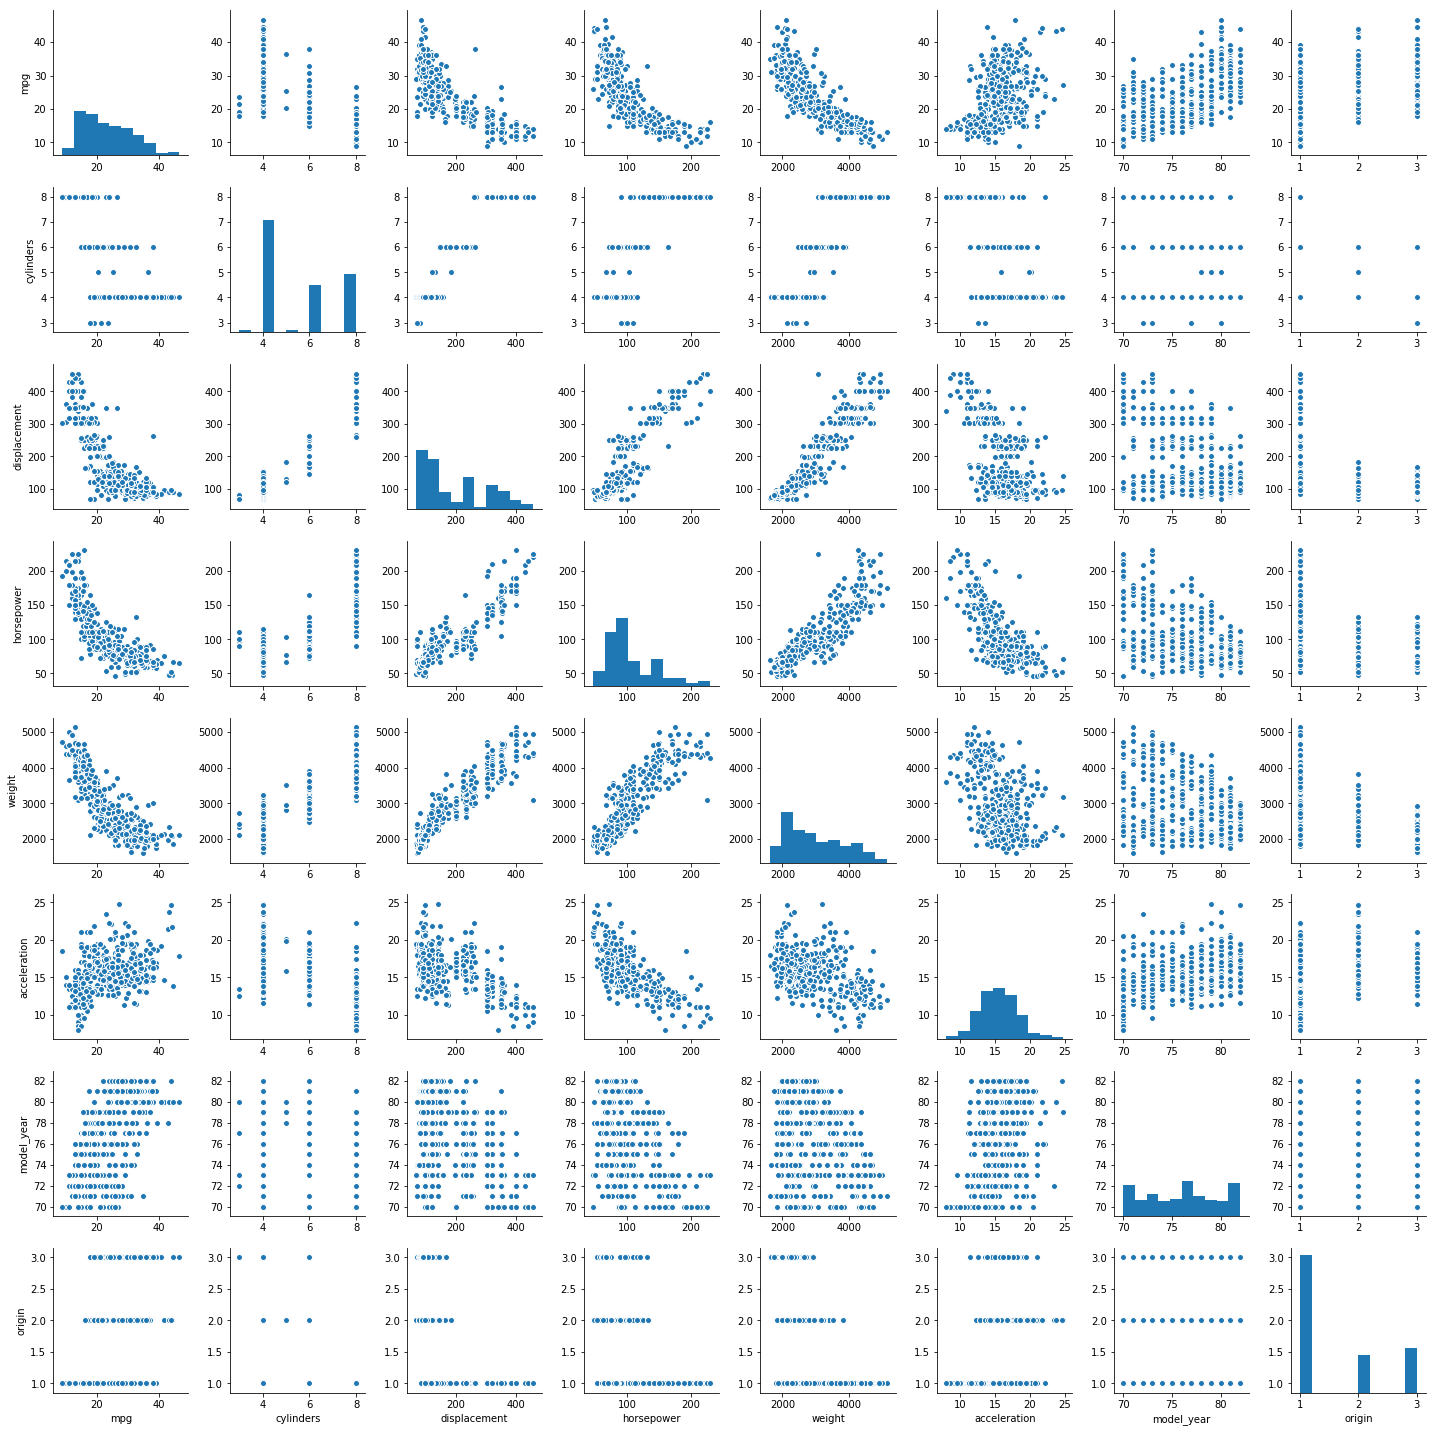

In [3145]:
sns.pairplot(auto_data)

### Statistics of mpg column 

In [3146]:
auto_data.mpg.describe()

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

### Distribution plot of mpg

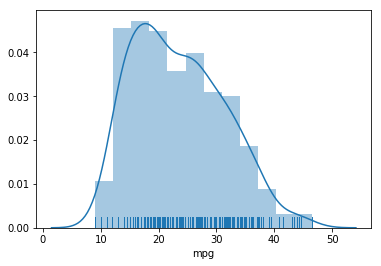

In [3147]:
sns.distplot(auto_data['mpg'],rug=True,hist=True,kde=True)

### Check the skewness and Kurtosis of mpg data

Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point. Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.

In [3148]:
print("Skewness: %f" % auto_data['mpg'].skew())
print("Kurtosis: %f" % auto_data['mpg'].kurt())

Skewness: 0.457092
Kurtosis: -0.515993


### Distribution plot of mpg without KDE and normalization of y-axis. 
The y-axis now shows the raw counts.

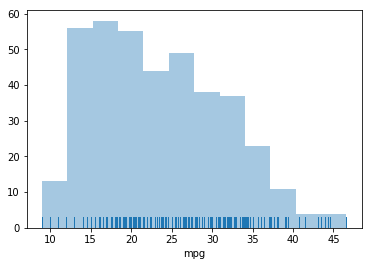

In [3149]:
sns.distplot(auto_data['mpg'],rug=True, hist=True, kde=False, norm_hist=False)

### Heat map of correlation matrix
This type of plot can help to quickly identify the most correlated variables. 

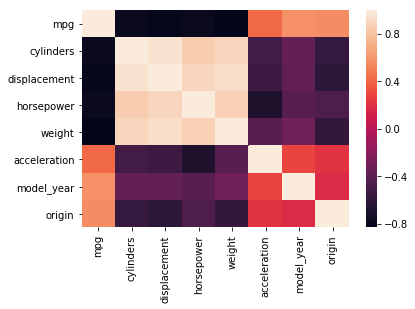

In [3150]:
sns.heatmap(auto_data.corr())

### Violin plot of country wise mpg distritbution
This plot clearly shows USA cars have low mileage.

In [3151]:
auto_data['Country'] = auto_data.origin.replace([1,2,3],['USA','Europe','Japan'])

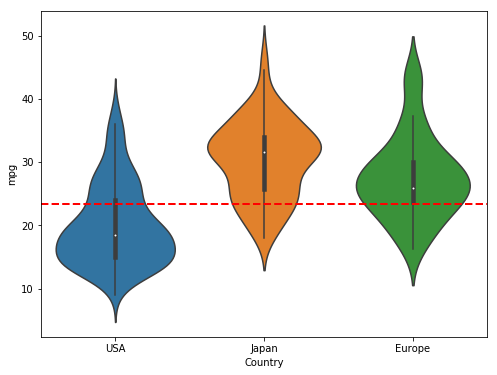

In [3152]:
plt_frame = pd.concat([auto_data['mpg'], auto_data['Country']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.violinplot(x="Country", y="mpg", data=plt_frame)
plt.axhline(auto_data.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

### Violin plot of year wise mpg distritbution
This plot clearly shows that mpg of the cars over years. The "mpg" value has increasing trend over the period of data collected.

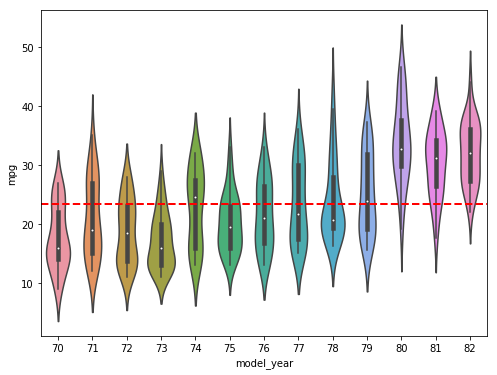

In [3153]:
plt_frame = pd.concat([auto_data['mpg'], auto_data['model_year']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.violinplot(x="model_year", y="mpg", data=plt_frame)
plt.axhline(auto_data.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

## Step 3: Hypothesis Testing and Machine Learning
Based on Step 2 - Exploratory Analysis & Visulization  we will build models to predict auto mpg. We will use multivariate linear regression models.




### Method 1: Feature Selection by plotting correlation heat map 

Correlation between each feature and mpg:
 mpg             1.000000
cylinders      -0.777618
displacement   -0.805127
horsepower     -0.778427
weight         -0.832244
acceleration    0.423329
model_year      0.580541
origin          0.565209
Name: mpg, dtype: float64


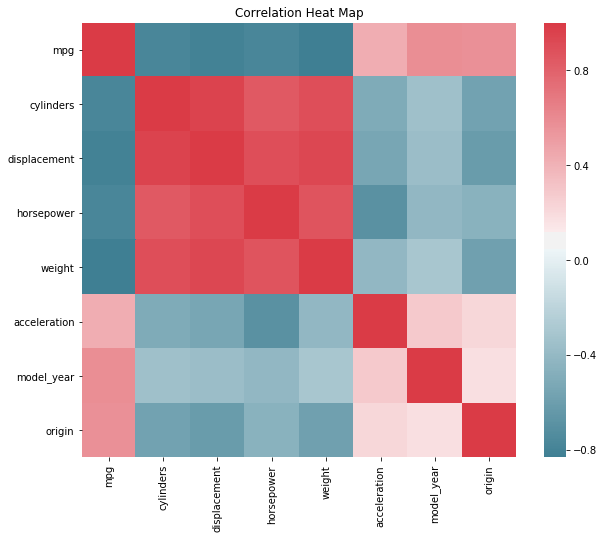

In [3154]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
plt.title('Correlation Heat Map')
corr = auto_data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
print("Correlation between each feature and mpg:\n",corr['mpg'])
plt.show()
plt.clf()

#### Conclusion: From the above correlation between mpg and other features, acceleration, model-year and origin has high correlation with mpg.

### Method 2: Feature Selection by comparing p-values of each feature 

In [3155]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import feature_selection


ols2 = smf.ols(formula = "mpg ~cylinders + displacement + horsepower + weight + acceleration + model_year + origin", data = auto_data).fit()
print(ols2.summary())





                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Thu, 14 Dec 2017   Prob (F-statistic):          2.04e-139
Time:                        20:47:49   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707   

#### Conclusion: Features with low p-values are origin, model_year, weight and displacement. Null hypothesis of p-value test is that the coefficient is equal to zero. Null hypothesis can be rejected if we get low p-value.

### Method 3: F-regression  by getting f score and p values ¶
f-regression, returns an array of f values of features and an array of p-value of f scores.

In [3156]:
f_score = feature_selection.f_regression(auto_data[['cylinders' , 'displacement' , 'horsepower' , 'weight' , 'acceleration' , 'model_year' , 'origin']],auto_data['mpg'])
print("p values:\n",f_score[1])

p values:
 [  1.31138364e-080   1.66064183e-090   7.03198903e-081   6.01529605e-102
   1.77857612e-018   1.07579356e-036   1.81108018e-034]


#### Conclusion: F-test Null Hypothesis is that there is no significant correlation between variables. A low p-value means strong correlation. Features- cylinders, displacement, horsepower, weight have low p-values and can be selected.

Based on the inputs from the three feature selection methods we will select the following features: 'cylinders','displacement','horsepower','weight','model_year','origin' 

## Training a Linear Regression Model- SELECTED FEATURES - MODEL 1

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the mpg column. We will toss out the acceleration column based on the feature selection exercise.

### X and y arrays

In [3157]:

X = auto_data[['cylinders','displacement','horsepower','weight','model_year','origin' ]]
y = auto_data['mpg']

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [3158]:
from sklearn.model_selection import train_test_split

In [3159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

## Creating and Training the Model
using SCIKIT-LEARN 

In [3160]:
from sklearn.linear_model import LinearRegression

In [3161]:
lm1 = LinearRegression()

In [3162]:
lm1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Model Evaluation

Let's evaluate the model by checking out it's intercept value and coefficients .

In [3163]:
print(lm1.intercept_)

-17.4262367863


###  Print coefficients by creating a dataframe.

In [3164]:
coeff_df = pd.DataFrame(lm1.coef_,X.columns,columns=['Coefficient'])
coeff_df

Coefficient
cylinders       -0.456978
displacement     0.018882
horsepower      -0.021362
weight          -0.006415
model_year       0.777172
origin           1.259208

###   Print coefficients by zipping feature_cols and returned coefficients.

In [3165]:

feature_cols = ['cylinders','displacement','horsepower','weight','model_year','origin']


In [3166]:
zipped = zip(feature_cols, lm1.coef_)


In [3167]:
for value1, value2 in zipped:
    print(value1,":", value2)
      

cylinders : -0.456978495549
displacement : 0.0188821158719
horsepower : -0.021362311891
weight : -0.0064149740689
model_year : 0.777171500008
origin : 1.25920782419


### Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in model_year is associated with 0.777171500008 increase in mpg
- Holding all other features fixed, a 1 unit increase in weight is associated with 0.0064149740689 decrease in mpg
- Holding all other features fixed, a 1 unit increase in horsepower is associated with 0.021362311891 decrease in mpg



## Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [3168]:
predictions = lm1.predict(X_test)

###  Plot scatterplot of test_data and predictions.

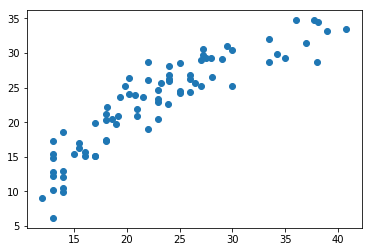

In [3169]:
plt.scatter(y_test,predictions)

### Plot Residual Histogram

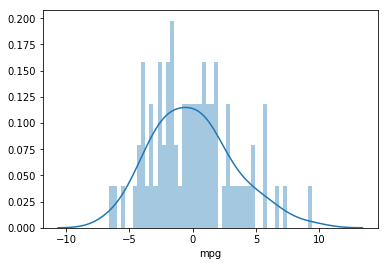

In [3170]:
sns.distplot((y_test-predictions),bins=50);

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [3171]:
lm1.score(X, y)

0.82081150458798458

In [3172]:

from sklearn import metrics

In [3173]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.57615335242
MSE: 10.4208423194
RMSE: 3.22813294637


#### RMSE is 3.22 
The RMSE is the square root of the variance of the residuals. It indicates the absolute fit of the model to the data–how close the observed data points are to the model’s predicted values. Whereas R-squared is a relative measure of fit, RMSE is an absolute measure of fit. As the square root of a variance, RMSE can be interpreted as the standard deviation of the unexplained variance, and has the useful property of being in the same units as the response variable. Lower values of RMSE indicate better fit. RMSE is a good measure of how accurately the model predicts the response, and is the most important criterion for fit if the main purpose of the model is prediction.

### Training a Linear Regression Model- INCLUDING ACCELERATION.- MODEL 2

Let's redo the to train out regression model including acceleration !

### X and y arrays

In [3174]:

X = auto_data[['cylinders','displacement','horsepower','weight','acceleration','model_year','origin' ]]
y = auto_data['mpg']

### Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [3175]:
from sklearn.model_selection import train_test_split

In [3176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

### Creating and Training the Model
using SCIKIT-LEARN 

In [3177]:
from sklearn.linear_model import LinearRegression

In [3178]:
lm2 = LinearRegression()

In [3179]:
lm2.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Model Evaluation

Let's evaluate the model by checking out it's intercept value and coefficients .

In [3180]:
print(lm2.intercept_)

-21.3153120868


###  Print coefficients by creating a dataframe.

In [3181]:
coeff_df = pd.DataFrame(lm2.coef_,X.columns,columns=['Coefficient'])
coeff_df

Coefficient
cylinders       -0.436144
displacement     0.021245
horsepower      -0.005952
weight          -0.007077
acceleration     0.173498
model_year       0.790060
origin           1.260579

###   Print coefficients by zipping feature_cols and returned coefficients.

In [3182]:

feature_cols = ['cylinders','displacement','horsepower','weight','acceleration','model_year','origin']


In [3183]:
zipped = zip(feature_cols, lm2.coef_)


In [3184]:
for value1, value2 in zipped:
    print(value1,":", value2)
      

cylinders : -0.436143699622
displacement : 0.0212451185126
horsepower : -0.0059521658237
weight : -0.0070770979647
acceleration : 0.173497953721
model_year : 0.790059567995
origin : 1.26057865507


### Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in model_year is associated with 0.790059567995 increase in mpg
- Holding all other features fixed, a 1 unit increase in weight is associated with 0.0070770979647 decrease in mpg
- Holding all other features fixed, a 1 unit increase in horsepower is associated with 0.0059521658237 decrease in mpg
- Holding all other features fixed, a 1 unit increase in acceleration is associated with 0.173497953721 increase in mpg



## Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [3185]:
predictions = lm2.predict(X_test)

###  Plot scatterplot of test_data and predictions.

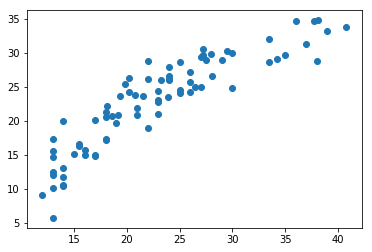

In [3186]:
plt.scatter(y_test,predictions)

### Plot Residual Histogram

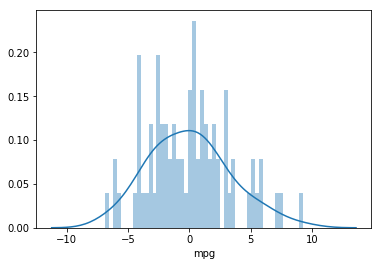

In [3187]:
sns.distplot((y_test-predictions),bins=50);

In [3188]:
lm2.score(X, y)

0.82059816214082526

In [3189]:

from sklearn import metrics

In [3190]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.62017242922
MSE: 10.8198371912
RMSE: 3.28935209293


### Cross Validation of the two models

In [3191]:
# cross validation  
from sklearn.model_selection import cross_val_score

#Model 1
scores1 = cross_val_score(lm1, auto_data[['cylinders','displacement','horsepower','weight','model_year','origin' ]], auto_data[['mpg']], cv=6)

#Model 2
scores2 = cross_val_score(lm2, auto_data[['cylinders','displacement','horsepower','acceleration','weight','origin','model_year']], 
                          auto_data[['mpg']], cv=6)

print('Cross validation score for the 1st model:\n',np.mean(scores1),'\n')
print('Cross validation score for the 2nd model:\n',np.mean(scores2),'\n')

Cross validation score for the 1st model:
 0.663173970927 

Cross validation score for the 2nd model:
 0.663369087317 



### Conclusion:
Cross validation is used to assess each model. From above result, the cross validation score of both the models are similar and aren't great. We should prefer the model with less number of features to avoid overfitting.

### Prediction of mpg of chevrolet chevelle malibu -1970 actual mpg 18 by the two models.

In [3192]:
lm1.predict([[8,307.0,130,3504,70,1]])

array([ 15.12078796])

In [3193]:
lm2.predict([[8,307.0,130,3504,12.0,70,1]])

array([ 14.79258073])

### Summary and references
In this tutorial, we studied the factors that affect auto mpg and the car features on how they affected the mpg of the cars in the auto-mpg dataset. We used two multivariate linear regression models.



- Auto-Mpg dataset: https://archive.ics.uci.edu/ml/datasets/Auto+MPG.
- Linear Regression: https://en.wikipedia.org/wiki/Linear_regression
- Cross-validation: https://en.wikipedia.org/wiki/Cross-validation_(statistics)
- Scikit-learn, machine learning in python: http://scikit-learn.org/stable/
